# Redukce dimenzionality

**Cíl:** 

Provedeme PCA s cílem analyzovat strukturu dat. Konkrétně se zaměříme na shluky v datasetu ručně psaných číslic


`scikit-Learn` obsahuje několik datasetů. My se blíže zaměříme na dataset `digits`, který obsahuje obrázky ručně psaných číslic, reprezentovaných maticí $8 \times 8$ (resp. $64$ rozměrným vektorem) pixelů v 16ti stupních šedi. Navíc jsou všechny obrázky olabelované hodnotou číslic, které jsou na nich napsané. Dataset lze načíst funkcí `load_digits`, která vrací dictionary.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation (so 0.000 is printed as 0.)


# Načtení datasetu digits
from sklearn.datasets import load_digits
digits = load_digits()
# Obrázky jsou uložené v `digits.data' a příslušné labely v `digits.target`:
X_digits, y_digits = digits.data, digits.target
print(digits.keys())
print('Rozměry datasetu:', X_digits.shape)
print('Maximální hodnota:', X_digits.max(), '\tMinimální hodnota:', X_digits.min())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
Rozměry datasetu: (1797, 64)
Maximální hodnota: 16.0 	Minimální hodnota: 0.0


In [2]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

#### Pojďme si data prohlédnout:

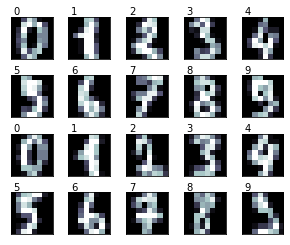

In [3]:
n_row, n_col = 4, 5

def print_digits(images, y, max_n=10):
    fig = plt.figure(figsize=(n_col, n_row))
    fig.subplots_adjust(hspace = 0.4)
    i=0
    while i < max_n and i < images.shape[0]:
        p = fig.add_subplot(n_row, n_col, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap='bone', interpolation='nearest')
        # Label obrázku podle skutečné hodnoty zobrazené číslice:
        p.text(0, -1, str(y[i]))
        i = i + 1

print_digits(digits.images, y_digits, max_n=20)

#### PCA s 10 komponentami

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_digits)
for i, explained_variance_ratio in enumerate(pca.explained_variance_):
    print("Rozptyl vysvětlený " + str(i + 1) + ". hlavní komponentou: ","%.1f" % explained_variance_ratio, '\tPodíl z celku: ', "%.2f" % pca.explained_variance_ratio_[i])

Rozptyl vysvětlený 1. hlavní komponentou:  179.0 	Podíl z celku:  0.15
Rozptyl vysvětlený 2. hlavní komponentou:  163.7 	Podíl z celku:  0.14
Rozptyl vysvětlený 3. hlavní komponentou:  141.8 	Podíl z celku:  0.12
Rozptyl vysvětlený 4. hlavní komponentou:  101.1 	Podíl z celku:  0.08
Rozptyl vysvětlený 5. hlavní komponentou:  69.5 	Podíl z celku:  0.06
Rozptyl vysvětlený 6. hlavní komponentou:  59.1 	Podíl z celku:  0.05
Rozptyl vysvětlený 7. hlavní komponentou:  51.9 	Podíl z celku:  0.04
Rozptyl vysvětlený 8. hlavní komponentou:  44.0 	Podíl z celku:  0.04
Rozptyl vysvětlený 9. hlavní komponentou:  40.3 	Podíl z celku:  0.03
Rozptyl vysvětlený 10. hlavní komponentou:  37.0 	Podíl z celku:  0.03


## 1. Použití PCA pro kompresi obrázků

K přechodům tam a zpět mezi projekcí a původní reprezentací můžeme využít metody `transform` a `inverse_transform`.

In [6]:
X_reduced = pca.transform(X_digits) # Transformuje data do projektovaného prostoru 10 hlavních komponent
print('Rozměry transformovaných dat:', X_reduced.shape)
print('Rozměry původních dat:', X_digits.shape)

Rozměry transformovaných dat: (1797, 10)
Rozměry původních dat: (1797, 64)


In [7]:
X_recovered = pca.inverse_transform(X_reduced) # Přetransformujme data zpět do původního prostoru 
print('Rozměry obnovených dat:', X_recovered.shape)

Rozměry obnovených dat: (1797, 64)


Reconstructed data


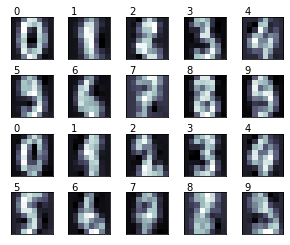

In [26]:
images_recovered = X_recovered.reshape(X_recovered.shape[0],8,8) # Reshape a bit (to plot it)
print_digits(images_recovered, y_digits, max_n=20)
print("Reconstructed data")

((1797, 10), (1797, 64))

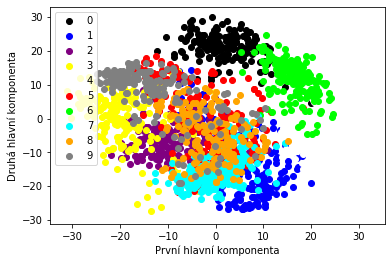

In [9]:
def plot_pca_scatter():
    colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
    for i in range(len(colors)):
        px = X_pca[:, 0][y_digits == i]
        py = X_pca[:, 1][y_digits == i]
        plt.scatter(px, py, c=colors[i])
        plt.legend(digits.target_names)
        plt.xlabel('První hlavní komponenta')
        plt.ylabel('Druhá hlavní komponenta')
        
n_components=2
plot_pca_scatter()
X_pca.shape, X_digits.shape

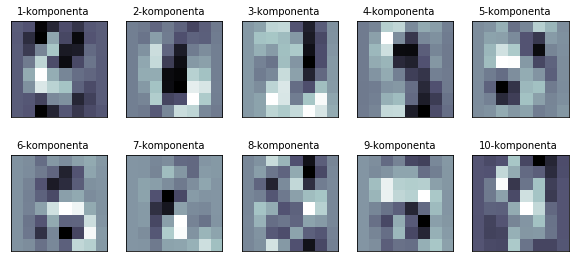

In [10]:
def print_pca_components(images, n_col, n_row):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    for i, comp in enumerate(images):
        if i <= n_col * n_row:
            plt.subplot(n_row, n_col, i + 1)
            plt.imshow(comp.reshape((8, 8)), interpolation='nearest', cmap='bone')
            plt.text(0, -1, str(i + 1) + '-komponenta')
            plt.xticks(())
            plt.yticks(())
        else:
            break
        
print_pca_components(pca.components_, 5, 2)

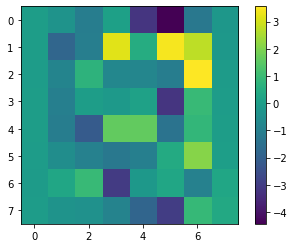

In [11]:
# Podívejme se na rozdíl mezi originálním a komprimovaným obrázkem pro první obrázek
plt.show()
plt.imshow((X_digits[0,:] - X_recovered[0,:]).reshape(8,-1), interpolation='nearest')
plt.colorbar()

#### Kvalitu té rekonstrukce můžeme měřit pomocí MSE (mean square error)
$$\text{MSE} = \frac{1}{N}\sum_{i=1}^N (x_i - \tilde x_i)^2.$$

In [12]:
from sklearn.metrics import mean_squared_error
print('MSE:', mean_squared_error(X_digits, X_recovered))

MSE: 4.914298993837538


In [13]:
print('Podíl vysvětleného rozptylu prvními 10 komponentami:', "%.3f" % np.sum(pca.explained_variance_ratio_))

Podíl vysvětleného rozptylu prvními 10 komponentami: 0.738


* Takže cca 74% rozptylu v datech je vysvětleno prvními 10 komponentami. 
* Průměrná chyba rekonstrukce je cca $5$, což je stejné, jako kdyby se v průměrném případě lišila v 5ti pixelech hodnota stupně šedi o 1. 

**To není špatné!**

### Úkol 1:

* Jak závisí tato chyba rekonstrukce (měřená pomocí MSE) na počtu komponent?
* Jak je to pro jednotlivé třídy (číslice)? Je nějaká číslice obtížněji rekonstruovatelná?

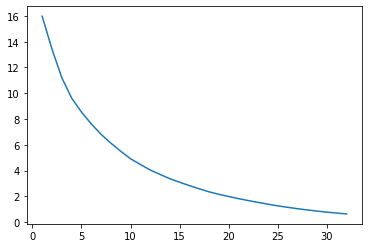

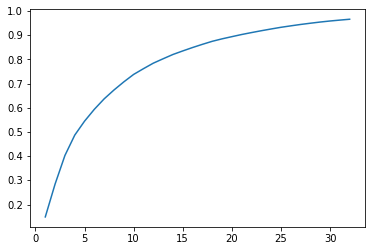

Cislice: 0  MSE: 15.977678462238192
Cislice: 1  MSE: 13.421012200762465
Cislice: 2  MSE: 11.206800697131591
Cislice: 3  MSE: 9.627986407134358
Cislice: 4  MSE: 8.542447615237005
Cislice: 5  MSE: 7.619390867019148
Cislice: 6  MSE: 6.809149152535433
Cislice: 7  MSE: 6.121812930450712
Cislice: 8  MSE: 5.492302612526843
Cislice: 9  MSE: 4.91431264715068


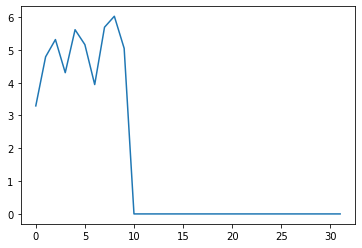

In [52]:
nmax = 32

MSE = np.zeros(nmax,)
rozptyl = np.zeros(nmax,)

for i in range(nmax):
    _pca = PCA(n_components = i+1)
    _X_pca = _pca.fit_transform(X_digits)
    MSE[i] = mean_squared_error(X_digits, _pca.inverse_transform(_X_pca))
    rozptyl[i] = np.sum(_pca.explained_variance_ratio_)
    
plt.plot(np.array(range(nmax)) + 1, MSE)
plt.show()
plt.plot(np.array(range(nmax)) + 1, rozptyl)
plt.show()

###

pca = PCA(n_components = 10)
Xpca = pca.fit_transform(X_digits)
MSE = np.zeros(nmax,) 

for i in range(10):
    MSE[i] = mean_squared_error(X_digits[y_digits == i,:], pca.inverse_transform(Xpca[y_digits == i,:]))
    print("Cislice:", i, " MSE:",MSEs[i])
    
plt.plot(MSE)
plt.show()


## 2. Využití redukce dimenzionality k vylepšení schopnosti predikce modelu

Obvyklé využití PCA (případně SVD) spočívá v projekci dat do nižší dimenze a následném trénování modelu na těchto projektovaných datech. Přitom doufáme, že to povede (a často to tak je) k vylepšení kvality modelu.

V našem případě budeme trénovat model na datech `X_reduced` s cílovou proměnnou v `y_digits`.

### Úkol 2: 

* Porovnejte schopnost predikce modelu logistické regrese natrénovaného na originálních datech oproti stejnému modelu natrénovanému na PCA redukovaných datech. 
* Jaký je vliv počtu použitých hlavních komponent? 
* Vykreslete závislost chyby modelu na počtu komponent.

/mnt/d/git/BI-VZD/__venv__/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/mnt/d/git/BI-VZD/__venv__/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/mnt/d/git/BI-VZD/__venv__/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/mnt/d/git/BI-VZD/__venv__/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/mnt/d/git/BI-VZD/__venv__/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Incre

/mnt/d/git/BI-VZD/__venv__/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/mnt/d/git/BI-VZD/__venv__/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/mnt/d/git/BI-VZD/__venv__/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/mnt/d/git/BI-VZD/__venv__/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/mnt/d/git/BI-VZD/__venv__/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Incre

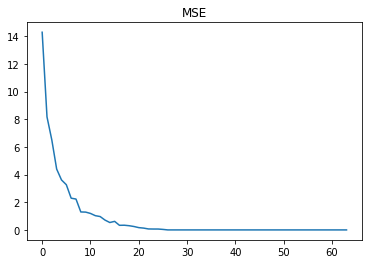

In [56]:
from sklearn.linear_model import LogisticRegression

dims = 64
mse= []
var = []

for i in range(1, dims+1):
    pca = PCA(n_components = i)
    X_reduced = pca.fit_transform(X_digits)
    
    model = LogisticRegression(solver="lbfgs", multi_class="multinomial").fit(X_reduced,y_digits)
    mse.append(mean_squared_error(model.predict(X_reduced),y_digits))
    
plt.title("MSE")
plt.plot(mse)
plt.show()

### Úkol 3: 

* Zkusme použít ne-lineární metodu redukce dimenzionality - LLE. 
* Ověřte, zda v tomto případě dojde k vylepšení. 

Můžete využít `LLE` (známe z přednášky) pomocí následujícího kódu:

In [ ]:
### Metoda LLE
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=15, n_neighbors=5)
Xlle = lle.fit_transform(X)


### Your code here

